1. Generacion del conjunto de datos

In [100]:
import numpy as np
x= 2 * np.random.rand(100,1)
y= 4 + 3 * x + np.random.rand(100,1)
print(len(x))

100


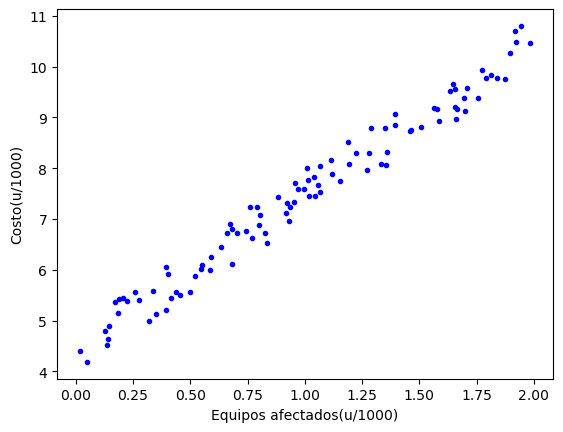

In [101]:
import matplotlib.pyplot as plt
plt.plot(x,y,'b.')
plt.xlabel("Equipos afectados(u/1000)")
plt.ylabel("Costo(u/1000)")
plt.show()

In [102]:
import pandas as pd
data = {'EquiposAfectados':x.flatten(),'costo':y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,EquiposAfectados,costo
0,0.142958,4.627909
1,1.984979,10.462129
2,0.519682,5.882019
3,1.654368,9.561391
4,1.221338,8.305619
5,1.692666,9.379994
6,1.564920,9.190068
7,0.455096,5.502772
8,1.066403,8.035506
9,1.039558,7.830207


In [103]:
df['EquiposAfectados'] = df['EquiposAfectados'] *1000
df['EquiposAfectados'] = df['EquiposAfectados'].astype('int')

df['costo']= df['costo']*10000
df['costo'] = df['costo'].astype('int')
df.head(10)

,EquiposAfectados,costo
0,142,46279
1,1984,104621
2,519,58820
3,1654,95613
4,1221,83056
5,1692,93799
6,1564,91900
7,455,55027
8,1066,80355
9,1039,78302


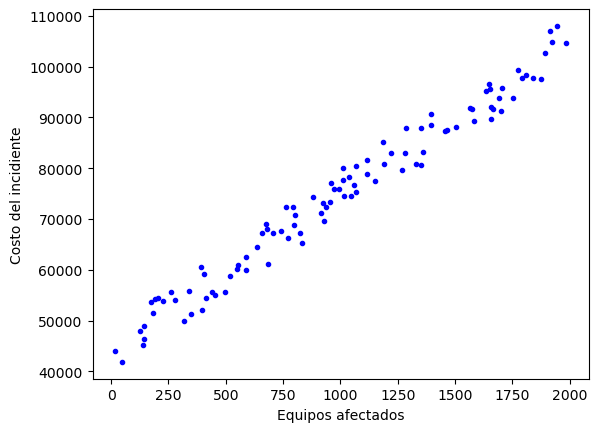

In [104]:
plt.plot(df['EquiposAfectados'],df['costo'],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidiente")
plt.show()

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
linReg=LinearRegression()
linReg.fit(df['EquiposAfectados'].values.reshape(-1,1),df['costo'].values)

LinearRegression()

In [107]:
linReg.intercept_

44718.39722327054

In [108]:
linReg.coef_

array([30.05394303])

In [109]:
x_min_max=np.array([[df['EquiposAfectados'].min()],[df['EquiposAfectados'].max()]])
yTraningPred = linReg.predict(x_min_max)

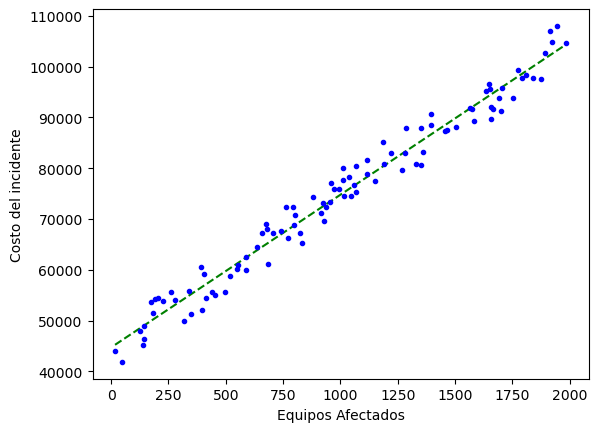

In [110]:
plt.plot(x_min_max,yTraningPred,"g--")
plt.plot(df['EquiposAfectados'],df['costo'],'b.')
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

In [114]:
xNuevo = np.array([[500]])
costo= linReg.predict(xNuevo)
print(costo)

[59745.36873757]


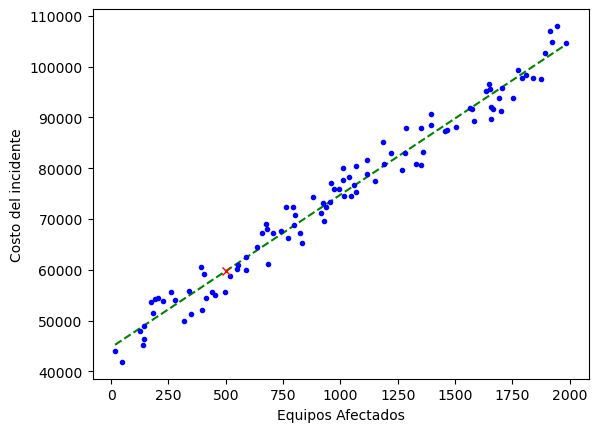

In [116]:
plt.plot(x_min_max,yTraningPred,"g--")
plt.plot(df['EquiposAfectados'],df['costo'],'b.')
plt.plot(xNuevo,costo,"rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()